<a href="https://colab.research.google.com/github/GuillermoArduino/MLTrabajos-Practica/blob/main/recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de Recomendación

Historia, conceptos y pruebas con surprise

# **Setup**
Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so
please be patient.

In [ ]:
!pip install surprise==0.1

     |████████████████████████████████| 11.8 MB 25.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630185 sha256=bdb87fb234d788402a1d956570801f7083c506fe5efaf2377a0de4a379d75ed2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


# Import

In [ ]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

# Data

In [ ]:
# Your code here to load the data...
# Load the movielens-100k dataset
# Ref: https://surprise.readthedocs.io/en/stable/dataset.html
data = Dataset.load_builtin('ml-100k')
print('Data loaded')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Data loaded


We also want to get a sense of what the data looks like. Please create a histogram of all the ratings we have in the dataset.

# QUESTION 1: DATA ANALYSIS
Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.


Some data of the raw_data DataFrame
-----------------------------------
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

Number of rows in the DataFrame
-------------------------------
user_id      100000
item_id      100000
rating       100000
timestamp    100000
dtype: int64

Some data of the ratings DataFrame
----------------------------------
0    3
1    3
2    1
3    2
4    1
Name: rating, dtype: int64


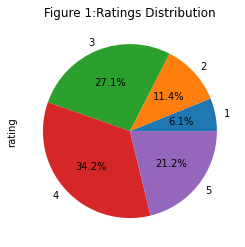

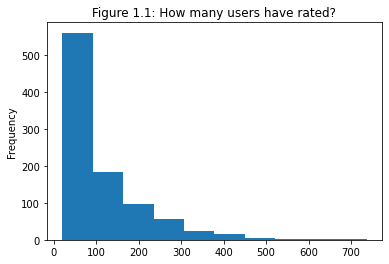

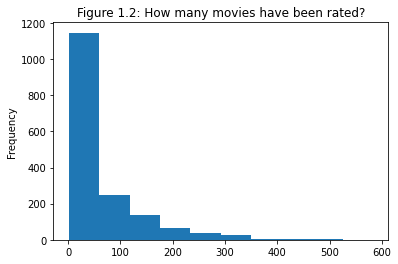

In [ ]:
# Your code here to create a ratings histogram...
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file
# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)
# Preview the data using pandas head() function
print ('')
print ('Some data of the raw_data DataFrame')
print ('-----------------------------------')
print(raw_data.head())
print ('')
print ('Number of rows in the DataFrame')
print ('-------------------------------')
print(raw_data.count())
# 3. Get the rating column
ratings = raw_data.rating
# Preview the data using pandas head() function
print ('')
print ('Some data of the ratings DataFrame')
print ('----------------------------------')
print(ratings.head())
# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.pie(autopct='%1.1f%%', title='Figure 1:Ratings Distribution')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
raw_data.groupby(['user_id']).count()['rating'].plot(kind='hist', ax=ax, title='Figure 1.1: How many users have rated?')
raw_data.groupby(['item_id']).count()['rating'].plot(kind='hist', ax=ax1, title='Figure 1.2: How many movies have been rated?')